In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.MC_results/S2_MC_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.0,0.000,0.096,0.302
1,Node 2,0.0,0.000,0.020,0.240
2,Node 3,0.0,0.000,0.000,0.010
3,Node 4,0.0,0.000,0.000,0.000
4,Node 5,0.0,0.000,0.000,0.000
...,...,...,...,...,...
60,Node 61,0.0,5.917,8.718,8.388
61,Node 62,0.0,0.000,0.000,0.002
62,Node 63,0.0,0.000,0.000,0.000
63,Node 64,0.0,0.000,0.004,0.022


In [3]:
##############
file_name = "d.smokedetector_t/0549_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000313,0.003880,0.010036,0.020543
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000000,0.000123,0.002346,0.010265
3,Node 4,0.000000,0.000114,0.002351,0.010706
4,Node 5,0.000000,0.000097,0.003375,0.013640
...,...,...,...,...,...
60,Node 61,0.000309,0.002772,0.007653,0.015094
61,Node 62,0.000000,0.000586,0.004781,0.012873
62,Node 63,0.000000,0.000828,0.005777,0.014698
63,Node 64,0.000010,0.000770,0.004419,0.011692


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000313,0.003880,0.010036,0.020543
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000000,0.000123,0.002346,0.010265
3,Node 4,0.000000,0.000114,0.002351,0.010706
4,Node 5,0.000000,0.000097,0.003375,0.013640
...,...,...,...,...,...
60,Node 61,0.000309,0.002772,0.007653,0.015094
61,Node 62,0.000000,0.000586,0.004781,0.012873
62,Node 63,0.000000,0.000828,0.005777,0.014698
63,Node 64,0.000010,0.000770,0.004419,0.011692


#### Pearson 상관계수

<Axes: >

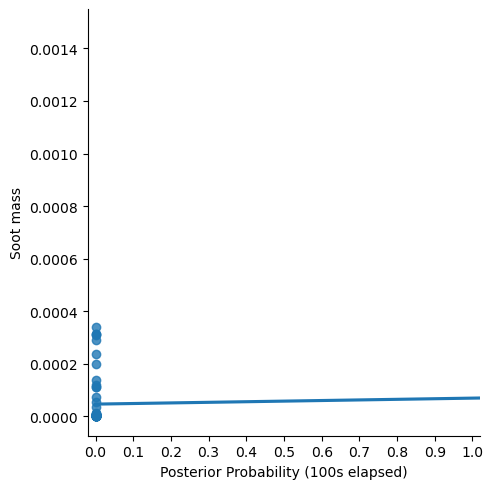

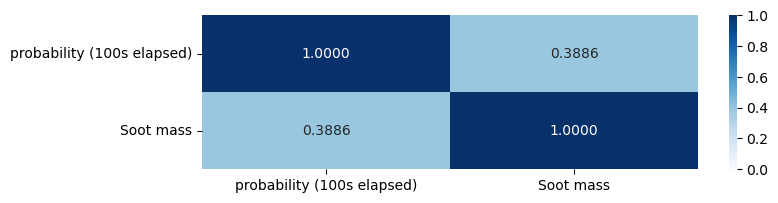

In [5]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

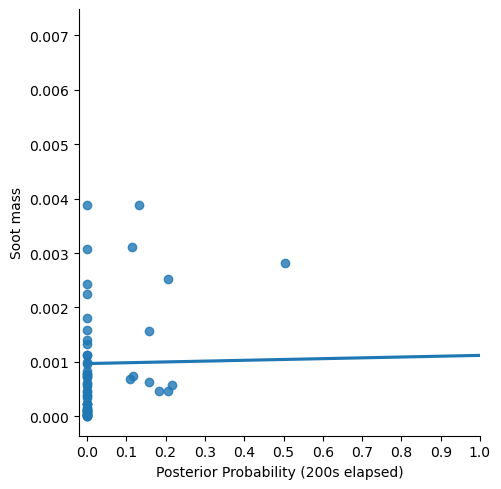

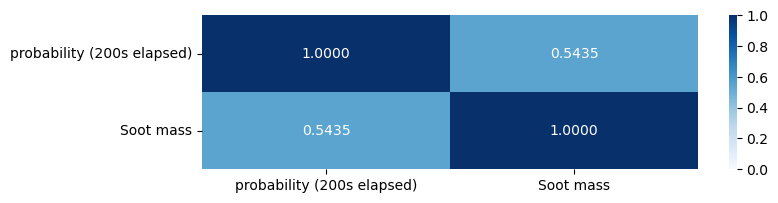

In [6]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

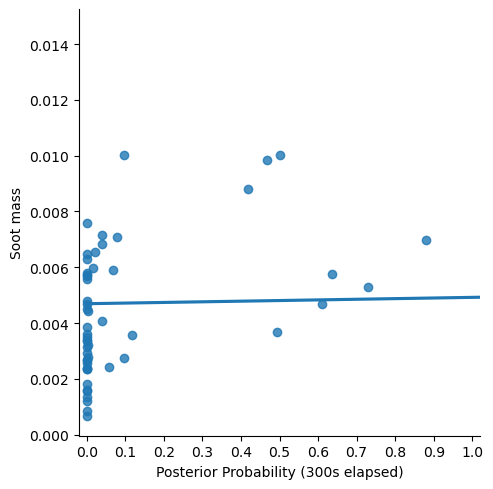

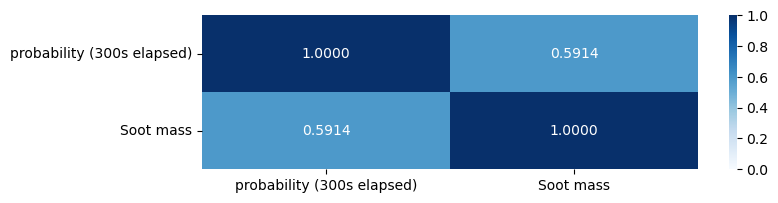

In [7]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

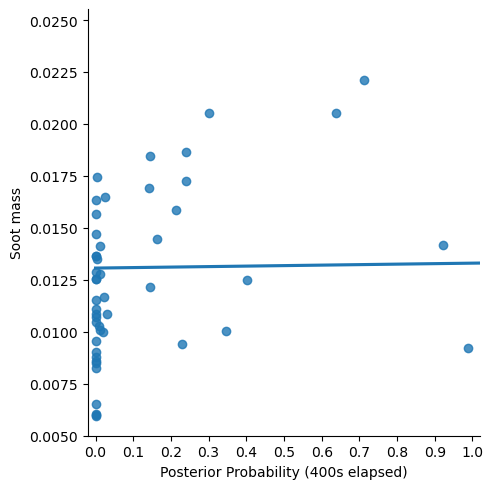

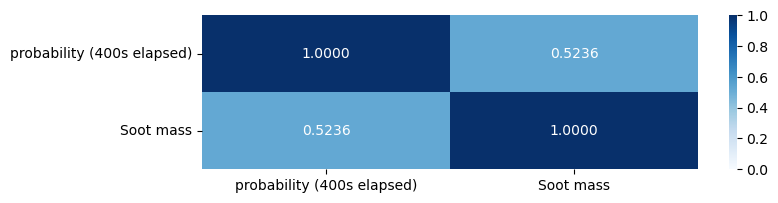

In [8]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

In [9]:
import math
import numpy as np
p_df_1st = df_1st.dropna()
p_df_2nd = df_2nd.dropna()
p_df_3rd = df_3rd.dropna()
p_df_4th = df_4th.dropna()
def Z_normalized(rawdata):
    XMIN = min(rawdata)
    XMAX = max(rawdata)
    XNORM = (rawdata-XMIN) / (XMAX-XMIN)
    
    return XNORM

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

In [10]:
#### spearman & pvalue 상관계수

Z_1=Z_normalized(p_df_1st['Soot mass'].values)
Z_2=Z_normalized(p_df_2nd['Soot mass'].values)
Z_3=Z_normalized(p_df_3rd['Soot mass'].values)
Z_4=Z_normalized(p_df_4th['Soot mass'].values)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.8713626050199844, pvalue=3.76961363305564e-21)
2: PearsonRResult(statistic=0.5489656009519708, pvalue=2.1907077417222447e-06)
3: PearsonRResult(statistic=0.3633277695216973, pvalue=0.0029319335430073655)
4: PearsonRResult(statistic=0.24314692181023656, pvalue=0.05097683302147117)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.38864055360121125, pvalue=0.0013776300043447732)
2: SignificanceResult(statistic=0.5434640981852363, pvalue=2.895689814951098e-06)
3: SignificanceResult(statistic=0.5913702347674233, pvalue=2.1365480383671258e-07)
4: SignificanceResult(statistic=0.5235734866406331, pvalue=7.6281981548706685e-06)


0.5259065409569305


C:\Users\lablj\AppData\Local\Temp\ipykernel_63728\508512873.py:23: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


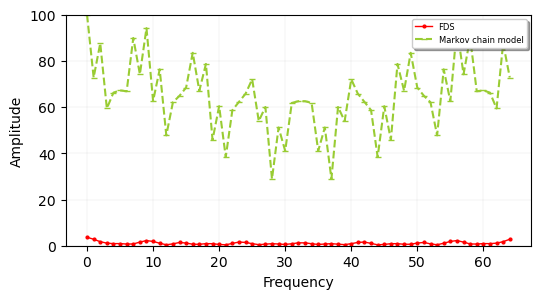

0.5024156665865683


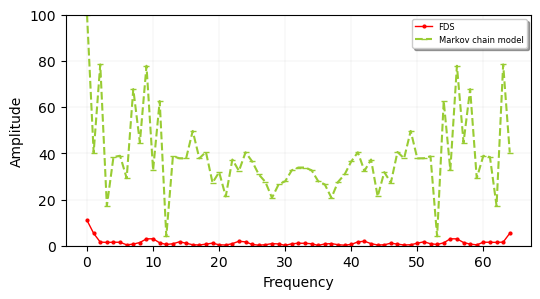

0.4735320778161582


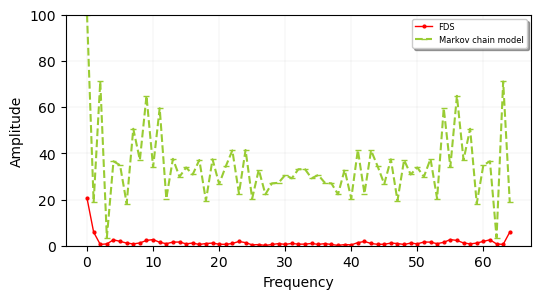

0.48688765743451184


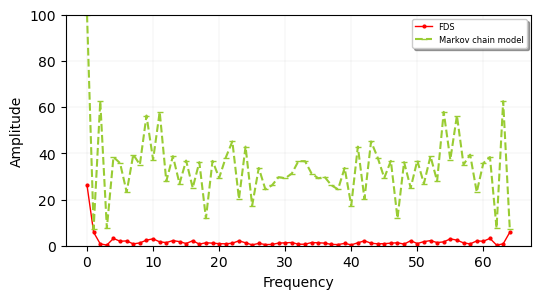

In [13]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=False):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    print(correlation)
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='Markov chain model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6}, fancybox=True, loc='upper right')
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 100, 10)
        plt.show()
    
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1, plot=True)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2, plot=True)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3, plot=True)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4, plot=True)